###  importing libs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

### read dataset

In [2]:
df= pd.read_csv("Credit_train1.csv")

In [3]:
df.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Interest Rate,Bankruptcies,Tax Liens
0,Fully Paid,213906,Short Term,NaN,NaN,2 years,Rent,Debt Consolidation,25121.99,13.5,NaN,31,0,346427,590766.0,10,0.0,0.0
1,Charged Off,772310,Long Term,687.0,3811400.0,4 years,Own Home,Debt Consolidation,47324.82,12.9,61.0,9,0,439242,652894.0,10,0.0,0.0
2,Fully Paid,35838,Short Term,716.0,831630.0,6 years,Rent,Debt Consolidation,18295.67,18.8,NaN,12,0,518396,709500.0,10,0.0,0.0
3,Fully Paid,68684,Short Term,NaN,NaN,NaN,Own Home,Home Improvements,4518.01,20.9,34.0,6,1,78299,175714.0,10,1.0,0.0
4,Fully Paid,379874,Long Term,721.0,1199831.0,4 years,Rent,Debt Consolidation,8758.81,20.4,NaN,7,2,97242,258258.0,10,0.0,0.0


In [4]:
df.tail()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Interest Rate,Bankruptcies,Tax Liens
49995,Fully Paid,147070,Short Term,725.0,475437.0,7 years,Own Home,other,2202.86,22.3,NaN,5,0,47766,658548.0,14,0.0,0.0
49996,Fully Paid,99999999,Short Term,732.0,1289416.0,1 year,Rent,Debt Consolidation,13109.05,9.4,21.0,22,0,153045,509234.0,14,0.0,0.0
49997,Fully Paid,103136,Short Term,742.0,1150545.0,6 years,Rent,Debt Consolidation,7315.57,18.8,18.0,12,1,109554,537548.0,14,1.0,0.0
49998,Fully Paid,530332,Short Term,746.0,1717524.0,9 years,Rent,Debt Consolidation,9890.07,15.0,NaN,8,0,404225,738254.0,14,0.0,0.0
49999,Fully Paid,99999999,Short Term,743.0,935180.0,NaN,Own Home,Debt Consolidation,9118.10,13.0,NaN,4,1,45600,91014.0,14,1.0,0.0


In [5]:
df.shape

(50000, 18)

In [45]:
df.columns

Index(['Loan Status', 'Current Loan Amount', 'Term', 'Credit Score',
       'Annual Income', 'Years in current job', 'Home Ownership', 'Purpose',
       'Monthly Debt', 'Years of Credit History', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Interest Rate', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [47]:
df.dtypes

Loan Status                   object
Current Loan Amount            int64
Term                          object
Credit Score                 float64
Annual Income                float64
Years in current job           int32
Home Ownership                object
Purpose                       object
Monthly Debt                 float64
Years of Credit History      float64
Number of Open Accounts        int64
Number of Credit Problems      int64
Current Credit Balance         int64
Maximum Open Credit          float64
Interest Rate                  int64
Bankruptcies                 float64
Tax Liens                    float64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan Status                   50000 non-null  object 
 1   Current Loan Amount           50000 non-null  int64  
 2   Term                          50000 non-null  object 
 3   Credit Score                  40456 non-null  float64
 4   Annual Income                 40456 non-null  float64
 5   Years in current job          47884 non-null  object 
 6   Home Ownership                50000 non-null  object 
 7   Purpose                       50000 non-null  object 
 8   Monthly Debt                  50000 non-null  float64
 9   Years of Credit History       50000 non-null  float64
 10  Months since last delinquent  23714 non-null  float64
 11  Number of Open Accounts       50000 non-null  int64  
 12  Number of Credit Problems     50000 non-null  int64  
 13  C

In [8]:
df.describe(include="all")

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Interest Rate,Bankruptcies,Tax Liens
count,50000,5.000000e+04,50000,40456.000000,4.045600e+04,47884,50000,50000,50000.000000,50000.000000,23714.000000,50000.000000,50000.000000,5.000000e+04,4.999900e+04,50000.000000,49888.000000,49998.000000
unique,2,NaN,2,NaN,NaN,11,4,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Fully Paid,NaN,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,38657,NaN,36175,NaN,NaN,15474,24105,39205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.165801e+07,NaN,1080.377027,1.377706e+06,NaN,NaN,NaN,18474.918899,18.226394,34.834149,11.135420,0.169760,2.924873e+05,7.309972e+05,12.019400,0.119267,0.029681
std,NaN,3.166113e+07,NaN,1483.271204,1.201593e+06,NaN,NaN,NaN,12021.186548,7.053144,21.962621,5.026373,0.481525,3.614408e+05,6.157513e+06,1.557521,0.354077,0.253541
min,NaN,1.080200e+04,NaN,585.000000,7.662700e+04,NaN,NaN,NaN,0.000000,3.700000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,10.000000,0.000000,0.000000
25%,NaN,1.792945e+05,NaN,705.000000,8.483595e+05,NaN,NaN,NaN,10259.382500,13.500000,16.000000,8.000000,0.000000,1.125370e+05,2.728440e+05,11.000000,0.000000,0.000000
50%,NaN,3.102220e+05,NaN,724.000000,1.179168e+06,NaN,NaN,NaN,16221.630000,16.900000,32.000000,10.000000,0.000000,2.089335e+05,4.673680e+05,12.000000,0.000000,0.000000
75%,NaN,5.232590e+05,NaN,741.000000,1.654406e+06,NaN,NaN,NaN,24030.155000,21.700000,51.000000,14.000000,0.000000,3.661348e+05,7.812200e+05,14.000000,0.000000,0.000000


### getting no. of null values and pertage of it

In [9]:
print(pd.isnull(df).sum())

Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                     9544
Annual Income                    9544
Years in current job             2116
Home Ownership                      0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    26286
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 1
Interest Rate                       0
Bankruptcies                      112
Tax Liens                           2
dtype: int64


Credit Score                     9544 & 
Annual Income                    9544 & 
Years in current job             2116 & 
Months since last delinquent    26286 & 
Maximum Open Credit                 1 & 
Bankruptcies                      112 & 
Tax Liens                           2 & 



In [10]:
missing_percentage =(df.isnull().sum() / len(df)) * 100
print((missing_percentage))

Loan Status                      0.000
Current Loan Amount              0.000
Term                             0.000
Credit Score                    19.088
Annual Income                   19.088
Years in current job             4.232
Home Ownership                   0.000
Purpose                          0.000
Monthly Debt                     0.000
Years of Credit History          0.000
Months since last delinquent    52.572
Number of Open Accounts          0.000
Number of Credit Problems        0.000
Current Credit Balance           0.000
Maximum Open Credit              0.002
Interest Rate                    0.000
Bankruptcies                     0.224
Tax Liens                        0.004
dtype: float64


here we drop column having more than 20% of null value

we drop column Months since last delinquent

and fill other columns

some samples with out change

In [11]:
df.sample(4)

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Interest Rate,Bankruptcies,Tax Liens
45480,Fully Paid,671418,Long Term,708.0,2126157.0,7 years,Rent,Debt Consolidation,33486.93,19.7,NaN,9,0,939208,1152030.0,10,0.0,0.0
27697,Fully Paid,172546,Short Term,728.0,745104.0,10+ years,Home Mortgage,Debt Consolidation,22166.92,18.1,29.0,9,0,163799,247918.0,12,0.0,0.0
26831,Fully Paid,521664,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,45475.17,16.2,17.0,11,0,517085,719642.0,11,0.0,0.0
37919,Fully Paid,324654,Short Term,732.0,897218.0,5 years,Home Mortgage,Debt Consolidation,15327.68,20.8,NaN,8,1,131233,173074.0,13,1.0,0.0


### fill null values of credit score with its mean

In [12]:
df['Credit Score'].mean()

1080.3770268934152

In [13]:
df['Credit Score'].fillna(df['Credit Score'].mean(), inplace=True)
df.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Interest Rate,Bankruptcies,Tax Liens
0,Fully Paid,213906,Short Term,1080.377027,NaN,2 years,Rent,Debt Consolidation,25121.99,13.5,NaN,31,0,346427,590766.0,10,0.0,0.0
1,Charged Off,772310,Long Term,687.000000,3811400.0,4 years,Own Home,Debt Consolidation,47324.82,12.9,61.0,9,0,439242,652894.0,10,0.0,0.0
2,Fully Paid,35838,Short Term,716.000000,831630.0,6 years,Rent,Debt Consolidation,18295.67,18.8,NaN,12,0,518396,709500.0,10,0.0,0.0
3,Fully Paid,68684,Short Term,1080.377027,NaN,NaN,Own Home,Home Improvements,4518.01,20.9,34.0,6,1,78299,175714.0,10,1.0,0.0
4,Fully Paid,379874,Long Term,721.000000,1199831.0,4 years,Rent,Debt Consolidation,8758.81,20.4,NaN,7,2,97242,258258.0,10,0.0,0.0


### fill null values of Annual Income with its median


In [14]:
df['Annual Income'].median()

1179168.5

In [15]:
df['Annual Income'].fillna(df['Annual Income'].median(), inplace=True)
df.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Interest Rate,Bankruptcies,Tax Liens
0,Fully Paid,213906,Short Term,1080.377027,1179168.5,2 years,Rent,Debt Consolidation,25121.99,13.5,NaN,31,0,346427,590766.0,10,0.0,0.0
1,Charged Off,772310,Long Term,687.000000,3811400.0,4 years,Own Home,Debt Consolidation,47324.82,12.9,61.0,9,0,439242,652894.0,10,0.0,0.0
2,Fully Paid,35838,Short Term,716.000000,831630.0,6 years,Rent,Debt Consolidation,18295.67,18.8,NaN,12,0,518396,709500.0,10,0.0,0.0
3,Fully Paid,68684,Short Term,1080.377027,1179168.5,NaN,Own Home,Home Improvements,4518.01,20.9,34.0,6,1,78299,175714.0,10,1.0,0.0
4,Fully Paid,379874,Long Term,721.000000,1199831.0,4 years,Rent,Debt Consolidation,8758.81,20.4,NaN,7,2,97242,258258.0,10,0.0,0.0


Extract numeric parts and replace non-numeric values from year column

In [16]:
df['Years in current job'] = df['Years in current job'].apply(lambda x: re.sub(r'\D', '', str(x)))

Convert the column to numeric

In [17]:
df['Years in current job'] = pd.to_numeric(df['Years in current job'], errors='coerce')


### fill null values of Years in current job with its mean

In [18]:
df['Years in current job'].mean()

5.9511319020967335

In [19]:
df['Years in current job'].fillna(df['Years in current job'].mean(), inplace=True)


 Change data type of year column as float to int

In [20]:
df['Years in current job']=df['Years in current job'].astype('int')


In [21]:
df.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Interest Rate,Bankruptcies,Tax Liens
0,Fully Paid,213906,Short Term,1080.377027,1179168.5,2,Rent,Debt Consolidation,25121.99,13.5,NaN,31,0,346427,590766.0,10,0.0,0.0
1,Charged Off,772310,Long Term,687.000000,3811400.0,4,Own Home,Debt Consolidation,47324.82,12.9,61.0,9,0,439242,652894.0,10,0.0,0.0
2,Fully Paid,35838,Short Term,716.000000,831630.0,6,Rent,Debt Consolidation,18295.67,18.8,NaN,12,0,518396,709500.0,10,0.0,0.0
3,Fully Paid,68684,Short Term,1080.377027,1179168.5,5,Own Home,Home Improvements,4518.01,20.9,34.0,6,1,78299,175714.0,10,1.0,0.0
4,Fully Paid,379874,Long Term,721.000000,1199831.0,4,Rent,Debt Consolidation,8758.81,20.4,NaN,7,2,97242,258258.0,10,0.0,0.0


### fill null values of Maximum Open Credit with its mean

In [22]:
df['Maximum Open Credit'].mean()

730997.1834636693

In [23]:
df['Maximum Open Credit'].fillna(df['Maximum Open Credit'].mean(), inplace=True)


In [24]:
df.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Interest Rate,Bankruptcies,Tax Liens
0,Fully Paid,213906,Short Term,1080.377027,1179168.5,2,Rent,Debt Consolidation,25121.99,13.5,NaN,31,0,346427,590766.0,10,0.0,0.0
1,Charged Off,772310,Long Term,687.000000,3811400.0,4,Own Home,Debt Consolidation,47324.82,12.9,61.0,9,0,439242,652894.0,10,0.0,0.0
2,Fully Paid,35838,Short Term,716.000000,831630.0,6,Rent,Debt Consolidation,18295.67,18.8,NaN,12,0,518396,709500.0,10,0.0,0.0
3,Fully Paid,68684,Short Term,1080.377027,1179168.5,5,Own Home,Home Improvements,4518.01,20.9,34.0,6,1,78299,175714.0,10,1.0,0.0
4,Fully Paid,379874,Long Term,721.000000,1199831.0,4,Rent,Debt Consolidation,8758.81,20.4,NaN,7,2,97242,258258.0,10,0.0,0.0


### fill null values of Bankruptcies with its mode

In [25]:
df['Bankruptcies'].mode()[0]

0.0

In [26]:
df['Bankruptcies'].fillna(df['Bankruptcies'].mode()[0], inplace=True)


In [27]:
df.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Interest Rate,Bankruptcies,Tax Liens
0,Fully Paid,213906,Short Term,1080.377027,1179168.5,2,Rent,Debt Consolidation,25121.99,13.5,NaN,31,0,346427,590766.0,10,0.0,0.0
1,Charged Off,772310,Long Term,687.000000,3811400.0,4,Own Home,Debt Consolidation,47324.82,12.9,61.0,9,0,439242,652894.0,10,0.0,0.0
2,Fully Paid,35838,Short Term,716.000000,831630.0,6,Rent,Debt Consolidation,18295.67,18.8,NaN,12,0,518396,709500.0,10,0.0,0.0
3,Fully Paid,68684,Short Term,1080.377027,1179168.5,5,Own Home,Home Improvements,4518.01,20.9,34.0,6,1,78299,175714.0,10,1.0,0.0
4,Fully Paid,379874,Long Term,721.000000,1199831.0,4,Rent,Debt Consolidation,8758.81,20.4,NaN,7,2,97242,258258.0,10,0.0,0.0


### fill null values of Tax Liens with its mode

In [28]:
df['Tax Liens'].mode()[0]

0.0

In [29]:
df['Tax Liens'].fillna(df['Tax Liens'].mode()[0], inplace=True)


In [30]:
df.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Interest Rate,Bankruptcies,Tax Liens
0,Fully Paid,213906,Short Term,1080.377027,1179168.5,2,Rent,Debt Consolidation,25121.99,13.5,NaN,31,0,346427,590766.0,10,0.0,0.0
1,Charged Off,772310,Long Term,687.000000,3811400.0,4,Own Home,Debt Consolidation,47324.82,12.9,61.0,9,0,439242,652894.0,10,0.0,0.0
2,Fully Paid,35838,Short Term,716.000000,831630.0,6,Rent,Debt Consolidation,18295.67,18.8,NaN,12,0,518396,709500.0,10,0.0,0.0
3,Fully Paid,68684,Short Term,1080.377027,1179168.5,5,Own Home,Home Improvements,4518.01,20.9,34.0,6,1,78299,175714.0,10,1.0,0.0
4,Fully Paid,379874,Long Term,721.000000,1199831.0,4,Rent,Debt Consolidation,8758.81,20.4,NaN,7,2,97242,258258.0,10,0.0,0.0


### 'Months since last delinquent' has contain so many missing values so we can drop this column

In [31]:
df = df.drop(columns='Months since last delinquent', axis=1)


In [32]:
df.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Interest Rate,Bankruptcies,Tax Liens
0,Fully Paid,213906,Short Term,1080.377027,1179168.5,2,Rent,Debt Consolidation,25121.99,13.5,31,0,346427,590766.0,10,0.0,0.0
1,Charged Off,772310,Long Term,687.000000,3811400.0,4,Own Home,Debt Consolidation,47324.82,12.9,9,0,439242,652894.0,10,0.0,0.0
2,Fully Paid,35838,Short Term,716.000000,831630.0,6,Rent,Debt Consolidation,18295.67,18.8,12,0,518396,709500.0,10,0.0,0.0
3,Fully Paid,68684,Short Term,1080.377027,1179168.5,5,Own Home,Home Improvements,4518.01,20.9,6,1,78299,175714.0,10,1.0,0.0
4,Fully Paid,379874,Long Term,721.000000,1199831.0,4,Rent,Debt Consolidation,8758.81,20.4,7,2,97242,258258.0,10,0.0,0.0


In [33]:
df.isnull().sum()

Loan Status                  0
Current Loan Amount          0
Term                         0
Credit Score                 0
Annual Income                0
Years in current job         0
Home Ownership               0
Purpose                      0
Monthly Debt                 0
Years of Credit History      0
Number of Open Accounts      0
Number of Credit Problems    0
Current Credit Balance       0
Maximum Open Credit          0
Interest Rate                0
Bankruptcies                 0
Tax Liens                    0
dtype: int64

### smaple after cleaning data 

In [43]:
df.sample(4)

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Interest Rate,Bankruptcies,Tax Liens
16367,Fully Paid,99999999,Short Term,742.000000,935465.0,2,Rent,wedding,7499.30,16.4,21,0,216638,677952.0,11,0.0,0.0
32886,Fully Paid,112046,Short Term,1080.377027,1179168.5,2,Home Mortgage,other,11610.90,12.2,10,0,293493,531806.0,13,0.0,0.0
10797,Fully Paid,99999999,Short Term,735.000000,525236.0,9,Home Mortgage,Debt Consolidation,13437.37,22.1,11,1,83163,520476.0,10,0.0,0.0
23905,Fully Paid,99999999,Short Term,725.000000,596334.0,5,Rent,Debt Consolidation,7553.45,15.5,7,0,272156,474584.0,14,0.0,0.0


In [34]:
df.corr()

,Current Loan Amount,Credit Score,Annual Income,Years in current job,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Interest Rate,Bankruptcies,Tax Liens
Current Loan Amount,1.000000,-0.095243,0.022803,0.001108,-0.008633,0.017047,-0.002501,-0.007194,0.009546,0.000298,0.002575,-0.008042,-0.001840
Credit Score,-0.095243,1.000000,-0.007096,-0.005548,-0.001136,-0.009333,0.008167,0.000420,-0.003346,-0.003763,-0.002474,-0.008494,0.014841
Annual Income,0.022803,-0.007096,1.000000,0.066992,0.383714,0.129989,0.114777,-0.007901,0.242000,0.041053,-0.005546,-0.036689,0.042213
Years in current job,0.001108,-0.005548,0.066992,1.000000,0.135141,0.210047,0.052639,0.033956,0.098997,0.007373,-0.007071,0.032380,0.011120
Monthly Debt,-0.008633,-0.001136,0.383714,0.135141,1.000000,0.200882,0.412212,-0.051982,0.481543,0.046283,-0.003578,-0.077680,0.024490
Years of Credit History,0.017047,-0.009333,0.129989,0.210047,0.200882,1.000000,0.134387,0.064665,0.210458,0.040398,0.002885,0.066173,0.018619
Number of Open Accounts,-0.002501,0.008167,0.114777,0.052639,0.412212,0.134387,1.000000,-0.014514,0.228601,0.035735,0.003287,-0.022630,0.004003
Number of Credit Problems,-0.007194,0.000420,-0.007901,0.033956,-0.051982,0.064665,-0.014514,1.000000,-0.116744,-0.017047,-0.002178,0.762773,0.577333
Current Credit Balance,0.009546,-0.003346,0.242000,0.098997,0.481543,0.210458,0.228601,-0.116744,1.000000,0.153348,-0.000295,-0.126746,-0.017967
Maximum Open Credit,0.000298,-0.003763,0.041053,0.007373,0.046283,0.040398,0.035735,-0.017047,0.153348,1.000000,0.000072,-0.018360,-0.002849


<AxesSubplot:>

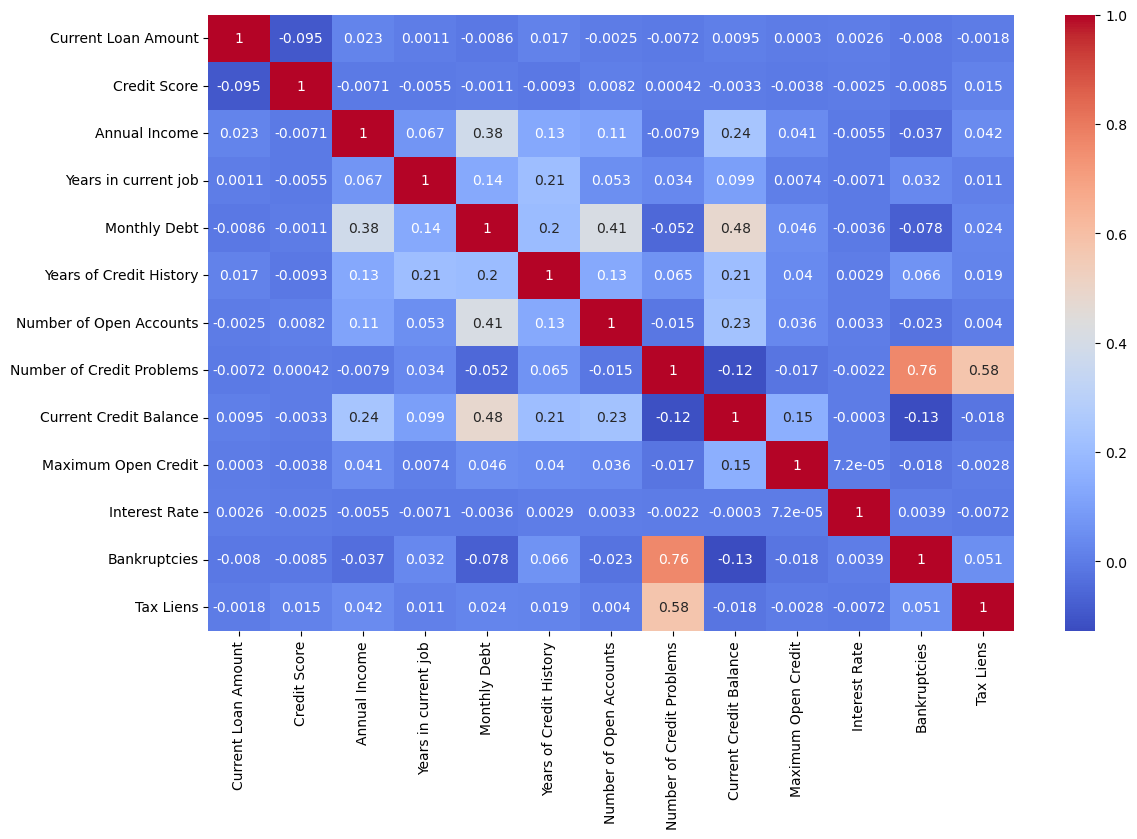

In [36]:
plt.figure(figsize=(13, 8))
sns.heatmap(df.corr(),  annot=True, cmap='coolwarm')

### Separate The Character and Numeric Data

In [37]:
character_cols = df.select_dtypes(include=['object'])
character_cols

,Loan Status,Term,Home Ownership,Purpose
0,Fully Paid,Short Term,Rent,Debt Consolidation
1,Charged Off,Long Term,Own Home,Debt Consolidation
2,Fully Paid,Short Term,Rent,Debt Consolidation
3,Fully Paid,Short Term,Own Home,Home Improvements
4,Fully Paid,Long Term,Rent,Debt Consolidation
...,...,...,...,...
49995,Fully Paid,Short Term,Own Home,other
49996,Fully Paid,Short Term,Rent,Debt Consolidation
49997,Fully Paid,Short Term,Rent,Debt Consolidation
49998,Fully Paid,Short Term,Rent,Debt Consolidation


In [38]:
numeric_cols = df.select_dtypes(include=['number'])
numeric_cols

,Current Loan Amount,Credit Score,Annual Income,Years in current job,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Interest Rate,Bankruptcies,Tax Liens
0,213906,1080.377027,1179168.5,2,25121.99,13.5,31,0,346427,590766.0,10,0.0,0.0
1,772310,687.000000,3811400.0,4,47324.82,12.9,9,0,439242,652894.0,10,0.0,0.0
2,35838,716.000000,831630.0,6,18295.67,18.8,12,0,518396,709500.0,10,0.0,0.0
3,68684,1080.377027,1179168.5,5,4518.01,20.9,6,1,78299,175714.0,10,1.0,0.0
4,379874,721.000000,1199831.0,4,8758.81,20.4,7,2,97242,258258.0,10,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,147070,725.000000,475437.0,7,2202.86,22.3,5,0,47766,658548.0,14,0.0,0.0
49996,99999999,732.000000,1289416.0,1,13109.05,9.4,22,0,153045,509234.0,14,0.0,0.0
49997,103136,742.000000,1150545.0,6,7315.57,18.8,12,1,109554,537548.0,14,1.0,0.0
49998,530332,746.000000,1717524.0,9,9890.07,15.0,8,0,404225,738254.0,14,0.0,0.0


### Create Dataframe Of Numeric and Character Columns

In [39]:
character_df = pd.DataFrame(character_cols)
numeric_df = pd.DataFrame(numeric_cols)

In [40]:
character_df

,Loan Status,Term,Home Ownership,Purpose
0,Fully Paid,Short Term,Rent,Debt Consolidation
1,Charged Off,Long Term,Own Home,Debt Consolidation
2,Fully Paid,Short Term,Rent,Debt Consolidation
3,Fully Paid,Short Term,Own Home,Home Improvements
4,Fully Paid,Long Term,Rent,Debt Consolidation
...,...,...,...,...
49995,Fully Paid,Short Term,Own Home,other
49996,Fully Paid,Short Term,Rent,Debt Consolidation
49997,Fully Paid,Short Term,Rent,Debt Consolidation
49998,Fully Paid,Short Term,Rent,Debt Consolidation


In [41]:
numeric_df

,Current Loan Amount,Credit Score,Annual Income,Years in current job,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Interest Rate,Bankruptcies,Tax Liens
0,213906,1080.377027,1179168.5,2,25121.99,13.5,31,0,346427,590766.0,10,0.0,0.0
1,772310,687.000000,3811400.0,4,47324.82,12.9,9,0,439242,652894.0,10,0.0,0.0
2,35838,716.000000,831630.0,6,18295.67,18.8,12,0,518396,709500.0,10,0.0,0.0
3,68684,1080.377027,1179168.5,5,4518.01,20.9,6,1,78299,175714.0,10,1.0,0.0
4,379874,721.000000,1199831.0,4,8758.81,20.4,7,2,97242,258258.0,10,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,147070,725.000000,475437.0,7,2202.86,22.3,5,0,47766,658548.0,14,0.0,0.0
49996,99999999,732.000000,1289416.0,1,13109.05,9.4,22,0,153045,509234.0,14,0.0,0.0
49997,103136,742.000000,1150545.0,6,7315.57,18.8,12,1,109554,537548.0,14,1.0,0.0
49998,530332,746.000000,1717524.0,9,9890.07,15.0,8,0,404225,738254.0,14,0.0,0.0
